In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("employee_data.csv")

In [4]:
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


# Outliers

## Min-Max Normalisation

In [11]:
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns
numeric_vars

Index(['Unnamed: 0', 'id', 'age', 'healthy_eating', 'active_lifestyle',
       'salary'],
      dtype='object')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

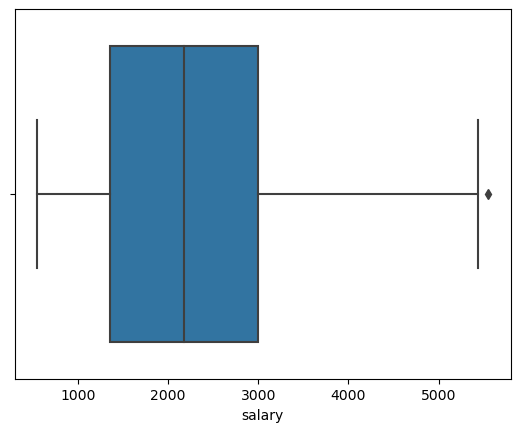

In [6]:
sns.boxplot(x = 'salary',data =df)
plt.show()

In [7]:
df_mm = df.copy()

In [8]:
min_val = df_mm['salary'].min()
max_val = df_mm['salary'].max()
df_mm['salary_min_max'] = (df_mm['salary'] - min_val)/ (max_val - min_val)

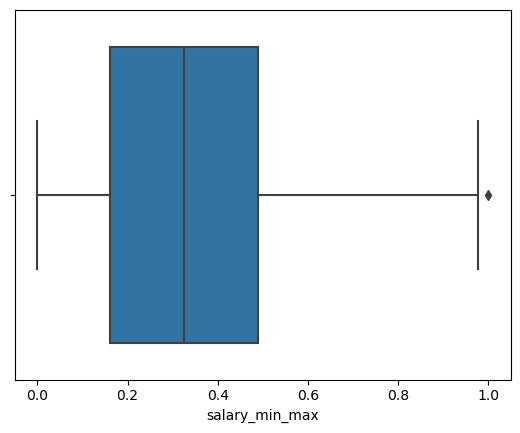

In [9]:
sns.boxplot(x = 'salary_min_max',data =df_mm)
plt.show()

 it's important to note that min-max normalization alone does not explicitly address outliers. If your data contains extreme outliers, they will still have a significant influence on the resulting normalized values. In such cases, alternative techniques such as winsorization or outlier removal may be more appropriate to handle outliers before applying normalization.

## Z-Transformation

In [13]:
df_z_trans = df.copy()
mean_value = df['salary'].mean()
std_value = df['salary'].std()
print(mean_value)
print(std_value)

2227.461
1080.2097600024754


In [11]:
df_z_trans['salary_z_trans'] = (df_z_trans['salary'] - mean_value) / std_value 

In [12]:
print(df_z_trans['salary_z_trans'].mean())
print(df_z_trans['salary_z_trans'].std())

1.9251267247000214e-16
0.9999999999999991


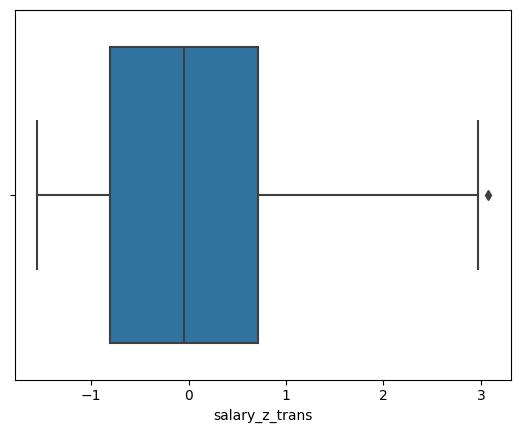

In [20]:
sns.boxplot(data = df_z_trans, x= 'salary_z_trans')
plt.show()

it's important to note that z-score normalization does not remove outliers or change their values. Outliers will still retain their extreme values but will be expressed in terms of standard deviations from the mean.

## Box plot

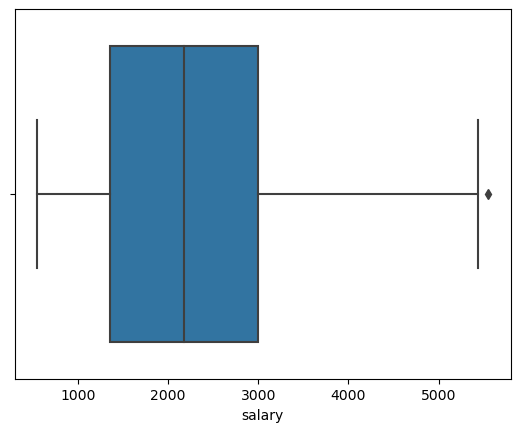

In [14]:
sns.boxplot(data=df,x='salary')
plt.show()

In [15]:
q1,q2, q3 = df['salary'].quantile(0.25),df['salary'].quantile(0.5) , df['salary'].quantile(0.75)

print("Median = ", q2)
# print(q1, q3)
iqr = q3-q1
print("IQR = ",iqr)

lower = max(q1 - 1.5*iqr, df['salary'].min())
upper = q3 + (1.5*iqr)
print("Lower = ",lower,"\nUpper = ", upper)

Median =  2174.0
1360.0 2993.75
IQR =  1633.75
Lower =  553 
Upper =  5444.375


In [16]:
drop_index = df['salary'][(df['salary'] > upper)].index
drop_index

Int64Index([607], dtype='int64')

In [17]:
df.drop(index=drop_index, inplace= True)

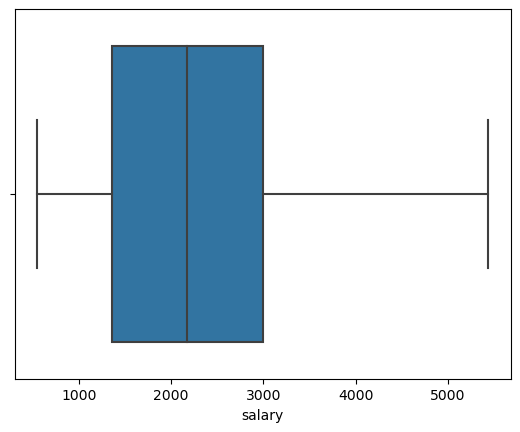

In [18]:
sns.boxplot(data=df,x='salary')
plt.show()